# Ishmaeva Bella
# Практическое задание 4


In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline

### I. Разложение ошибки на смещение и разброс
#### Теоретическое вступление
На занятиях мы разбирали примеры аналитического вычисления смещения и разброса нескольких алгоритмов обучения. Для большинства моделей данных и алгоритмов обучения аналитически рассчитать математические ожидания в формулах не удастся. Однако мат. ожидания можно оценивать приближенно. Чтобы оценить математическое ожидание $\mathbb{E}_{\bar x} f(\bar x)$ функции от многомерной случайной величины $\bar x = (x_1, \dots, x_d)$, $\bar x \sim p(\bar x)$, можно сгенерировать выборку из распределения $p(\bar x)$ и усреднить значение функции на элементах этой выборки:
$$\mathbb{E}_{\bar x} f(x) = \int f(\bar x) p(\bar x) d \bar x \approx \frac 1 m \sum_{i=1}^m f(\bar x_i), \, \bar x_i \sim p(\bar x), i = 1, \dots, m.$$

Для оценки многомерных интегралов ($d > 1$) объекты лучше генерировать, следуя специальным схемам, чтобы адекватно оценивать значение интеграла в областях высокой плотности. Мы не будем так усложнять задачу, а просто будем генерировать $\bar x_i$ независимо.

Например, оценим $\mathbb{E}_x x^2,$ $x \sim \mathcal{N}(\mu=5, \sigma=3)$ (из теории вероятностей мы знаем, что
$\mathbb{E}_x x^2 = \sigma^2 + \mu^2 = 34$):

In [2]:
x = np.random.normal(loc=5, scale=3, size=1000)
(x**2).mean()

35.80019763089463

Или посчитаем многомерный интеграл $\mathbb{E}_{\bar x} \bar x^T \bar x = \mathbb{E}_{\bar x} \sum_{i=1}^d x_i^2$, $\bar x \sim \mathcal{N}(\bar \mu=(1, \dots, 1), \Sigma=I)$ при $d = 10$ (аналитический ответ 20):

In [3]:
d = 10
X = np.random.multivariate_normal(np.ones(10), np.eye(10), size=1000)
(X**2).sum(axis=1).mean()

19.695475504206399

Чтобы оценить интеграл по выборке, можно сгенерировать несколько выборок, вычислить на них значение функции и усреднить. Например, для интеграла $\mathbb{E}_X [\mu(X)(x)]$ генерируются выборки $X_1, \dots, X_m$, на каждой из них обучается алгоритм $\mu$ и делается предсказание для объекта $x$.

#### Практическая часть
#####  Построение "среднего" алгоритма $\mathbb{E}_X [\mu(X)]$
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм $\mathbb{E}_X [\mu(X)]$ аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

__1 (0.6 балла)__
1. Сгенерируйте выборку x из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных y как сумму f(x) и случайного шума, сгенерированного из равномерного распределения на отрезке [-1, 1] (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: f(x) и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

In [4]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

In [5]:
from sklearn import tree

X = np.random.exponential(size = sample_size)
noise = np.random.uniform(low=-1, high=1, size=sample_size)
y = f(X) + noise

# чтобы sklearn не ругался
X = X.reshape(-1,1)
linspace = linspace.reshape(-1,1)

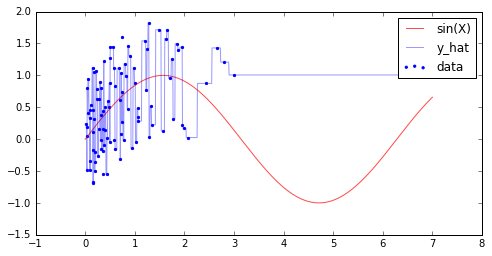

In [17]:
model = tree.DecisionTreeRegressor()
model = model.fit(X, y)
y_hat = model.predict(linspace)

fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(8)

plt.plot(linspace, f(linspace), color='red', alpha = 0.7, label='sin(X)')
plt.plot(linspace, y_hat, color='blue', alpha = 0.4, label='y_hat')
plt.scatter(X, y, color = "blue", s =5, label = 'data')
plt.legend(loc = 1)
plt.show()

__2 (0.6 балла):__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

In [7]:
def gen_func(sample_size, linspace, model, f):
    fig = plt.figure()
    fig.set_figheight(4)
    fig.set_figwidth(8)
    
    all_trees = []
    for i in range(samples_num):
        X = np.random.exponential(size = sample_size)
        noise = np.random.uniform(low=-1, high=1, size = sample_size)
        y = f(X) + noise

        X = X.reshape(-1,1)
        model = model.fit(X, y)
        y_hat = model.predict(linspace)
        all_trees.append(y_hat)

        plt.plot(linspace, y_hat, color='gray', alpha = 0.4)
    
    plt.plot(linspace, np.asarray(all_trees).mean(axis=0), color='black',alpha = 0.7,label = 'mean y_hat')
    plt.plot(linspace, f(linspace), color='red', alpha = 0.7, label = 'sin(X)')
    plt.scatter(X, y, color = "blue", s =5, label = 'data')
    plt.legend(loc = 1)
    plt.show()

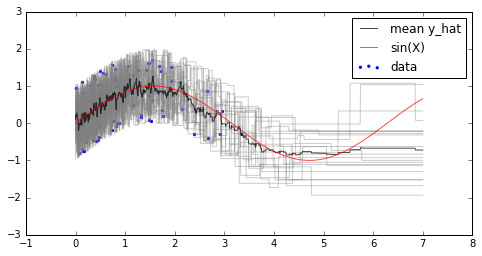

In [16]:
model = tree.DecisionTreeRegressor()
gen_func(sample_size,linspace,model,f)

__3 (0.2 балла):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

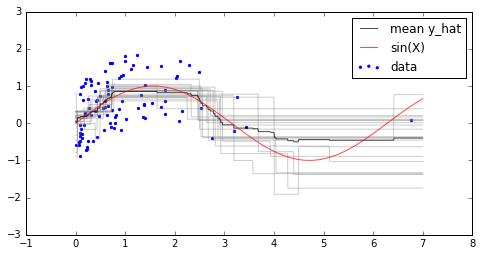

In [9]:
model = tree.DecisionTreeRegressor(max_depth=2)
gen_func(sample_size,linspace,model,f)

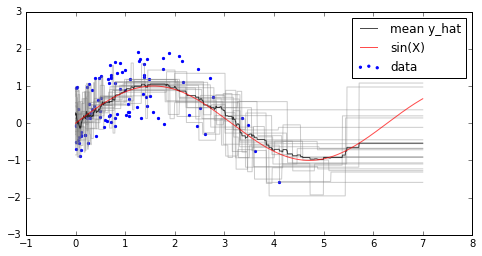

In [10]:
model = tree.DecisionTreeRegressor(max_depth=4)
gen_func(sample_size,linspace,model,f)

__4 (0.6 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

* Смещение зависит от того, какие ограничения мы накладываем на алгоритм, чем больше ограничений - тем мы ожидаем большее смещение. Как видно на графиках, наибольшее смещение у деревьев с глубиной 2, т.е. с наибольшим ограничением.

* Исходя из этого, смещение будет близко к нулю в том случае, когда ограничений на глубину нет, так как в таком случае мы не ограничиваем алгоритм и позволяем ему лучше уловить истинну зависимость.(стоит отметить, что даже при глубине 4, смещение уже намного меньше, чем при губине 2). 

__5 (1 балл)__
Проделайте тот же эксперимент с линейной регрессией и SVM с rbf ядром и параматрами $\gamma = 1$, $\gamma = 100$. Какие выводы можно сделать?

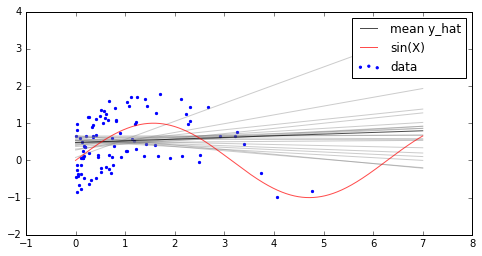

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

gen_func(sample_size, linspace, model, f)

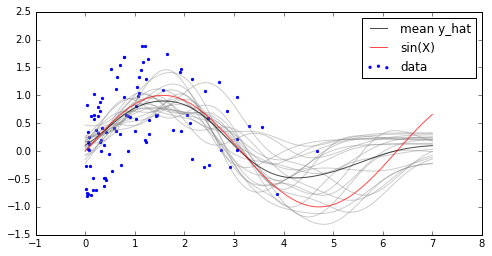

In [14]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', gamma=1)

gen_func(sample_size, linspace, model, f)

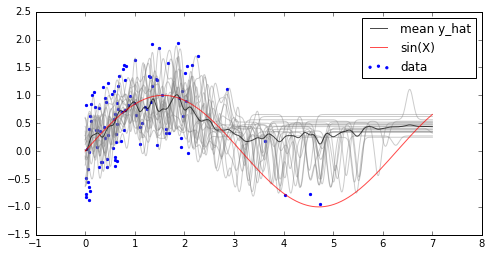

In [15]:
model = SVR(kernel='rbf', gamma=100)

gen_func(sample_size, linspace, model, f)

* Как правило смещенее у "простых" алгоритмов больше, чем у "сложных". В нашем случае самым простым является линейная модель - для нее смещение наибольшее. Метод опорных векторов дает меньшее смещение, по сравнению с линейной моедлью. Однако выбор $\gamma$ также имеет свое влияние: чем больше этот гиперпараметр, тем сильнее переобучается алгоритм. Это видно на последнем графике - при $\gamma$ = 100 прямая менее плавная, чем при $\gamma$ = 1.

### II. Решающие деревья

__5 (1 балл)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-rac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc - это класс 0, good, vgood - класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend - класс 0, very_recom, priority, spec_prior - класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTreeClassifier, считающий все признаки вещественными
* DecisionTreeClassfier, считающий все признаки категориальными
* DecisionTreeClassifier, c корректным разбиением на категориальные и вещественные признаки.

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.

In [82]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [86]:
def change_dtype(X,y):
    
    # предположим, что в датафрейме все переменные - категориальные 
    enc = OneHotEncoder()
    enc.fit(X)
    X_cat = enc.transform(X).toarray()
    clf = tree.DecisionTreeClassifier(random_state=42)
    accuracy_cat = np.mean(cross_val_score(clf, X_cat, y, cv=10, scoring=make_scorer(accuracy_score)))
    
    # теперь, что все переменные - вещественные 
    accuracy_real = np.mean(cross_val_score(clf, X, y, cv=10, scoring=make_scorer(accuracy_score)))
    
    print("Если все категроиальные, то accuracy = ", accuracy_cat)
    print("Если все вещественные, то accuracy = ", accuracy_real)

### 1. Mushrooms

In [93]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushroom = pd.read_csv(url, header=None)
mushroom.head(3) #видим, что нет ни одного вещественного признака

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [94]:
for i in range(mushroom.shape[1]):
    print(mushroom.iloc[:,i].value_counts())
    print()

e    4208
p    3916
Name: 0, dtype: int64

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: 1, dtype: int64

y    3244
s    2556
f    2320
g       4
Name: 2, dtype: int64

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: 3, dtype: int64

f    4748
t    3376
Name: 4, dtype: int64

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: 5, dtype: int64

f    7914
a     210
Name: 6, dtype: int64

c    6812
w    1312
Name: 7, dtype: int64

b    5612
n    2512
Name: 8, dtype: int64

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: 9, dtype: int64

t    4608
e    3516
Name: 10, dtype: int64

b    3776
?    2480
e    1120
c     556
r     192
Name: 11, dtype: int64

s    5176
k    2372
f     552
y      24
Name: 12, dtype: int64

s    4936
k    2304
f     600
y     284
Name: 13, dtype: int64

w    4464
p   

In [95]:
# закодируем категориальные признаки
label = LabelEncoder()
for i in mushroom.columns:
    label.fit(mushroom.iloc[:, (i-1)])
    mushroom.iloc[:, (i-1)] = label.transform(mushroom.iloc[:, (i-1)])

y = mushroom.iloc[:,0]
X = mushroom.iloc[:,1:]

In [96]:
change_dtype(X,y)

Если все категроиальные, то accuracy =  0.956428444679
Если все вещественные, то accuracy =  0.961853238754


* В данном df все признаки категориальные, однако accuracy выше, если мы рассматриваем признаки как вещественные - что очень странно, ведь мы знали заранее, что они категориальные. Возможно, мы получили такой результат, так как закодированные переменные имели какое-то порядковое соотношение.

### 2. Tic-rac-toe

In [105]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data'
trt = pd.read_csv(url, header=None)
trt.head(3)

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive


In [106]:
for i in range(trt.shape[1]):
    print(trt.iloc[:,i].value_counts())
    print()

x    418
o    335
b    205
Name: 0, dtype: int64

x    378
o    330
b    250
Name: 1, dtype: int64

x    418
o    335
b    205
Name: 2, dtype: int64

x    378
o    330
b    250
Name: 3, dtype: int64

x    458
o    340
b    160
Name: 4, dtype: int64

x    378
o    330
b    250
Name: 5, dtype: int64

x    418
o    335
b    205
Name: 6, dtype: int64

x    378
o    330
b    250
Name: 7, dtype: int64

x    418
o    335
b    205
Name: 8, dtype: int64

positive    626
negative    332
Name: 9, dtype: int64



In [103]:
# закодируем категориальные признаки
label = LabelEncoder()
for i in trt.columns:
    label.fit(trt.iloc[:, (i-1)])
    trt.iloc[:, (i-1)] = label.transform(trt.iloc[:, (i-1)])

y = trt.iloc[:,9]
X = trt.iloc[:,:9]

In [104]:
change_dtype(X,y)

Если все категроиальные, то accuracy =  0.811394239465
Если все вещественные, то accuracy =  0.748024394104


* На этот раз данные тоже категориальные, но принимают одни и те же три значения в каждом столбце. Accuracy выше, если рассматриваем их как категориальные.


### 3. Cars

In [129]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
cars = pd.read_csv(url, header=None)
cars.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [130]:
for i in range(cars.shape[1]):
    print(cars.iloc[:,i].value_counts())
    print()

med      432
vhigh    432
high     432
low      432
Name: 0, dtype: int64

med      432
vhigh    432
high     432
low      432
Name: 1, dtype: int64

4        432
5more    432
3        432
2        432
Name: 2, dtype: int64

more    576
4       576
2       576
Name: 3, dtype: int64

med      576
small    576
big      576
Name: 4, dtype: int64

med     576
high    576
low     576
Name: 5, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: 6, dtype: int64



* во втором и третьем столбце стоят перемнные, над которыми определен порядок, заменим '5more' и 'more' на числа, чтобы эти столбцы стали полностью вещественными.
* также закодируем вектор ответов, как указано в задании.

In [131]:
cars.iloc[:, 2].replace('5more', 5, inplace = True)
cars.iloc[:, 3].replace('more', 6, inplace = True)
cars.iloc[:, 6].replace(['unacc', 'acc'], 0, inplace = True)
cars.iloc[:, 6].replace(['good', 'vgood'], 1, inplace = True)

In [132]:
# закодируем категориальные признаки
label = LabelEncoder()
for i in [0,1,4,5,6]:
    label.fit(cars.iloc[:, (i)])
    cars.iloc[:, (i)] = label.transform(cars.iloc[:, (i)])

y = cars.iloc[:,6]
X = cars.iloc[:,:6]

In [133]:
change_dtype(X,y)

Если все категроиальные, то accuracy =  0.831001069233
Если все вещественные, то accuracy =  0.940390269981


In [135]:
enc = OneHotEncoder()
enc.fit(X.iloc[:, [0,1,4,5]])
X_hot = enc.transform(X.iloc[:, [0,1,4,5]]).toarray()
X = np.array(np.hstack([X.iloc[:, [2,3]].values, X_hot]), dtype=np.float32)
clf = tree.DecisionTreeClassifier(random_state=42)
accuracy_right = np.mean(cross_val_score(clf, X, y, cv=10, scoring=make_scorer(accuracy_score)))
print("Если правильное разбиение, то accuracy = ", accuracy_right)

Если правильное разбиение, то accuracy =  0.796117348303


* Вданном случае, мы получили, что при правильном разбиении, accuracy все равно ниже, чем если все вещественные. Объяснение - изначально переменные хоть и были категориальными, но из их названия, можно было опеределить соотношения: low < med < < high < vhigh, а значит на самом деле они несут смысл вещественных переменных.

### 4. Nursery

In [142]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data'
nursery = pd.read_csv(url, header=None)
nursery.head(3)

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom


In [143]:
for i in range(nursery.shape[1]):
    print(nursery.iloc[:,i].value_counts())
    print()

great_pret     4320
pretentious    4320
usual          4320
Name: 0, dtype: int64

very_crit      2592
proper         2592
critical       2592
less_proper    2592
improper       2592
Name: 1, dtype: int64

foster        3240
incomplete    3240
completed     3240
complete      3240
Name: 2, dtype: int64

3       3240
more    3240
1       3240
2       3240
Name: 3, dtype: int64

critical      4320
less_conv     4320
convenient    4320
Name: 4, dtype: int64

inconv        6480
convenient    6480
Name: 5, dtype: int64

nonprob          4320
slightly_prob    4320
problematic      4320
Name: 6, dtype: int64

recommended    4320
not_recom      4320
priority       4320
Name: 7, dtype: int64

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: 8, dtype: int64



In [144]:
nursery.iloc[:, 3].replace('more', 4, inplace = True)
nursery.iloc[:, 8].replace(['not_recom', 'recommend'], 0, inplace = True)
nursery.iloc[:, 8].replace(['very_recom', 'priority', 'spec_prior'], 1, inplace = True)

In [145]:
# закодируем категориальные признаки
label = LabelEncoder()
for i in [0,1,2,4,5,6,7]:
    label.fit(nursery.iloc[:, (i)])
    nursery.iloc[:, (i)] = label.transform(nursery.iloc[:, (i)])

y = nursery.iloc[:,8]
X = nursery.iloc[:,:8]

In [146]:
change_dtype(X,y)

Если все категроиальные, то accuracy =  0.999845797995
Если все вещественные, то accuracy =  0.999691477008


In [147]:
enc = OneHotEncoder()
enc.fit(X.iloc[:, [0,1,2,4,5,6,7]])
X_hot = enc.transform(X.iloc[:, [0,1,2,4,5,6,7]]).toarray()
X = np.array(np.hstack([X.iloc[:, [3]].values, X_hot]), dtype=np.float32)
clf = tree.DecisionTreeClassifier(random_state=42)
accuracy_right = np.mean(cross_val_score(clf, X, y, cv=10, scoring=make_scorer(accuracy_score)))
print("Если правильное разбиение, то accuracy = ", accuracy_right)

Если правильное разбиение, то accuracy =  0.99953715602


* В данном примере результаты очень близки, и рассмотрение переменных как категориальные дает чуть более высокий accuracy.


__6 (0.5 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

* Результат различается от данных к данным -> уникально хорошего спасоба нет :(
* Стоит отметить, что в первом датафрейме признаки значения признаков различаются по сути (разные буквы) и по количеству категорий (где-то 2 категории, где-то 7). 
* Во втором: категориальные переменные принимают одни и те же 3 значения в каждой колонке, более того, соотношение значений имеет всего три распределения (те в каждой колонке частота появления -  либо 378/330/250, либо 458/340/160, либо 418/335/205) и нет никакой смысловой нагрузки. В данном случае получили наибольший accuracy в случае категориальной модели.
* В третьем: каждая категориальная перемнная принимает всего три значения и имеет порядковое соотношение по смыслу, причем одно из трех значений категориальной переменной появляется в колонке равновероятно. Логично, что наибольшее accuracy нам дает вещественная модель.
* В четвертом: случай как и с третьим датафреймом. Наилучший результат у категориальной модели, но они очень близки с вещественной и правильным разбиением. 
* Еще в первом и втором датафрейме наиболее адекватное соотношение классов, в третьем и четвертом есть ответы, которые встречались только пару раз. Это так же может влиять на результат алгоритма (он просто не будет предсказывать этот класс и ошибка все равно будет маленькой)
* Случайность может отражаться в предварительном случайном перемешивании данных. Опытным путем было показано, что это влияет на итоговый accuracy.

### III. Композиции деревьев
#### Сравнение композиционных методов над решающими деревьями
__7 (1 балл)__

Выполните следующие шаги:
1. Загрузите датасет [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) в датафрейм. Последний столбец - целевая переменная (содержит классы).
1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * BaggingClassifier со 100 деревьями; каждое дерево обучается только по половине случайно выбранных признаков (см. параметры метода)
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом. Этот пример демонстрирует, что RandomForest - это более сложный алгоритм, чем бэггинг и бэггинг со случайными подпространствами. 

In [149]:
from sklearn import ensemble
df = pd.read_csv("winequality-red.csv", sep = ';')

In [150]:
X = df.iloc[:, :-1]
y = df['quality']

#DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()
print('DecisionTreeClassifier')
print(np.mean(cross_val_score(clf,X, y, cv=3, scoring='accuracy')))
print()

#BaggingClassifier
clf = ensemble.BaggingClassifier(n_estimators = 100)
print('BaggingClassifier')
print(np.mean(cross_val_score(clf,X, y, cv=3, scoring='accuracy')))
print()

#BaggingClassifier на случайных подвыборках
clf = ensemble.BaggingClassifier(n_estimators = 100, max_samples = 0.5)
print('BaggingClassifier на случайных подвыборках')
print(np.mean(cross_val_score(clf,X, y, cv=3, scoring='accuracy')))
print()

# RandomForestClassifier
clf = ensemble.RandomForestClassifier(n_estimators = 100)
print('RandomForestClassifier')
print(np.mean(cross_val_score(clf,X, y, cv=3, scoring='accuracy')))

DecisionTreeClassifier
0.445919817421

BaggingClassifier
0.554820782649

BaggingClassifier на случайных подвыборках
0.567909429727

RandomForestClassifier
0.564803587014


* Видим, что результат действительно улучшается от алгоритма к алгоритму

#### Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__8 (1 балл)__

Продолжим работать с набором данных [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). Разделите выборку на обучение и контроль с пропорции 7:3, предварительно перемешав объекты. Переберите значения от 100 до 5000 деревьев с шагом 100, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $100 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

In [151]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=10)

In [152]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=2)

/Users/Bella/Applications/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [153]:
clf = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1,warm_start=True, random_state=43)

res = []
rng = []
for i in range(1,51):
    clf.fit(X_train, y_train)
    res.append(accuracy_score(y_test, clf.predict(X_test)))
    rng.append(i*100)
    clf.set_params(n_estimators = (i+1)*100)

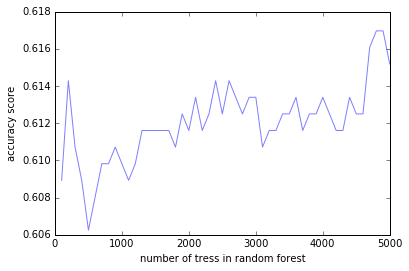

In [154]:
plt.plot(rng, res, alpha=0.5)
plt.xlabel('number of tress in random forest')
plt.ylabel('accuracy score')
plt.show()

* Как видно из графика, при возрастании количества деревьев в лесу accuracy возрастает. Так как accuracy варьируется в пределах от [0.606; 0.618] нет оснований полагать, что алгоритм переобучается, не смотря на то, что мы так сильно увеличиваем кол-во деревьев. Однако, нельзя сказать, что результат "устаканивается" с возрастанием кол-ва деревьев: результаты на 200 и на 4900 деревьях не сильно отличаются.

### IV. Нейронные сети

*На обучение нейросетей может уйти больше часа, не откладывайте этот пункт на последний день*.

__9 (1 балл)__

В этом задании вам предстоит обучить нейронную сеть на датасете [MNIST](https://en.wikipedia.org/wiki/MNIST_database) с помощью пакета [keras](https://keras.io).

In [13]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


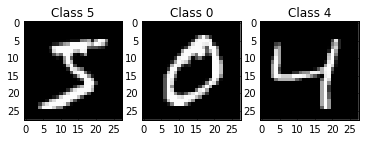

In [15]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [16]:
X_train = X_train.reshape(60000, 784) # так как нам нужны векторы
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # шкалируем к [0,1]
X_test /= 255

nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes) # из вектора в число
Y_test = np_utils.to_categorical(y_test, nb_classes)

Обучите нейронную сеть с двумя скрытыми слоями в каждой из которых поместите по 100 нейронов. Какого качества удается добиться на тесте?

In [17]:
# сеть с двумя слоями
model = Sequential()
model.add(Dense(100, input_shape=(784,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# обучаем модель
model.fit(x = X_train, y = Y_train, validation_data=(X_test, Y_test), batch_size=200, nb_epoch=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s - loss: 0.3949 - acc: 0.8909 - val_loss: 0.1922 - val_acc: 0.9435
Epoch 2/20
60000/60000 [==============================] - 2s - loss: 0.1601 - acc: 0.9529 - val_loss: 0.1327 - val_acc: 0.9601
Epoch 3/20
60000/60000 [==============================] - 2s - loss: 0.1141 - acc: 0.9658 - val_loss: 0.1176 - val_acc: 0.9633
Epoch 4/20
60000/60000 [==============================] - 2s - loss: 0.0888 - acc: 0.9729 - val_loss: 0.0964 - val_acc: 0.9702
Epoch 5/20
60000/60000 [==============================] - 2s - loss: 0.0708 - acc: 0.9790 - val_loss: 0.0890 - val_acc: 0.9706
Epoch 6/20
60000/60000 [==============================] - 2s - loss: 0.0589 - acc: 0.9825 - val_loss: 0.0832 - val_acc: 0.9757
Epoch 7/20
60000/60000 [==============================] - 2s - loss: 0.0483 - acc: 0.9852 - val_loss: 0.0828 - val_acc: 0.9729
Epoch 8/20
60000/60000 [==============================] - 2s 

In [19]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9747


* Нам удалось достичь accuracy = 0.9747

__10 (2 балл)__
Добавьте сверточные и pooling слои (вы можете также убрать Dense слои), добейтесь большего качества. Для успешного выполнения задания получите accuracy больше 0.99 на тестовой выборке. 

Рекомендации: после сверточных слоев наиболее эффективно добавлять MaxPooling слои, в конце перед последним слоем поставьте Dense слои с достаточно большим количеством нейронов. Подвигайте количество слоев, learning rate, функции активации.

In [20]:
X_train.shape

(60000, 784)

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes) 
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [22]:
model = Sequential()
model.add(Conv2D(64, 5, 5, input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# полносвязный слой
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile( metrics=['accuracy'], optimizer='adam', loss='categorical_crossentropy')

In [23]:
# обучаем модель
model.fit(x = X_train, y = Y_train, validation_data=(X_test, Y_test), batch_size=16, nb_epoch=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 151s - loss: 0.1104 - acc: 0.9652 - val_loss: 0.0478 - val_acc: 0.9841
Epoch 2/10
60000/60000 [==============================] - 139s - loss: 0.0427 - acc: 0.9866 - val_loss: 0.0404 - val_acc: 0.9864
Epoch 3/10
60000/60000 [==============================] - 132s - loss: 0.0256 - acc: 0.9920 - val_loss: 0.0369 - val_acc: 0.9888
Epoch 4/10
60000/60000 [==============================] - 127s - loss: 0.0176 - acc: 0.9944 - val_loss: 0.0524 - val_acc: 0.9846
Epoch 5/10
60000/60000 [==============================] - 135s - loss: 0.0128 - acc: 0.9957 - val_loss: 0.0513 - val_acc: 0.9855
Epoch 6/10
60000/60000 [==============================] - 133s - loss: 0.0106 - acc: 0.9966 - val_loss: 0.0460 - val_acc: 0.9878
Epoch 7/10
60000/60000 [==============================] - 140s - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0441 - val_acc: 0.9897
Epoch 8/10
60000/60000 [=======================

In [25]:
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test accuracy: %.2f' %(score[1]))

Test accuracy: 0.99


* Видим, что accuracy увеличислся до 0,99

__11 (1 балл)__
Добавьте 1 или 2 dropout слоя внутрь сети предыдущего шага. Удается ли добиться большего качества? Что происходит с процессом обучения? 

In [26]:
model = Sequential()
model.add(Conv2D(64, 5, 5, input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
# полносвязный слой
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(metrics=['accuracy'], optimizer='adam', loss='categorical_crossentropy')

In [29]:
# обучаем модель
model.fit(x = X_train, y = Y_train, validation_data=(X_test, Y_test), batch_size=16, nb_epoch=7)

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 161s - loss: 0.1423 - acc: 0.9579 - val_loss: 0.0492 - val_acc: 0.9846
Epoch 2/7
60000/60000 [==============================] - 159s - loss: 0.0582 - acc: 0.9826 - val_loss: 0.0414 - val_acc: 0.9866
Epoch 3/7
60000/60000 [==============================] - 152s - loss: 0.0425 - acc: 0.9869 - val_loss: 0.0431 - val_acc: 0.9874
Epoch 4/7
60000/60000 [==============================] - 147s - loss: 0.0323 - acc: 0.9896 - val_loss: 0.0393 - val_acc: 0.9882
Epoch 5/7
60000/60000 [==============================] - 146s - loss: 0.0268 - acc: 0.9909 - val_loss: 0.0398 - val_acc: 0.9886
Epoch 6/7
60000/60000 [==============================] - 151s - loss: 0.0226 - acc: 0.9927 - val_loss: 0.0386 - val_acc: 0.9896
Epoch 7/7
60000/60000 [==============================] - 148s - loss: 0.0190 - acc: 0.9939 - val_loss: 0.0411 - val_acc: 0.9898


In [30]:
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9898


* После добавления dropout accuracy остался равен 0.99, но модель меньше переобучилась

For this part of HW I used [tutorial on keras](https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb)